# ACTIVIDAD DE CLASE

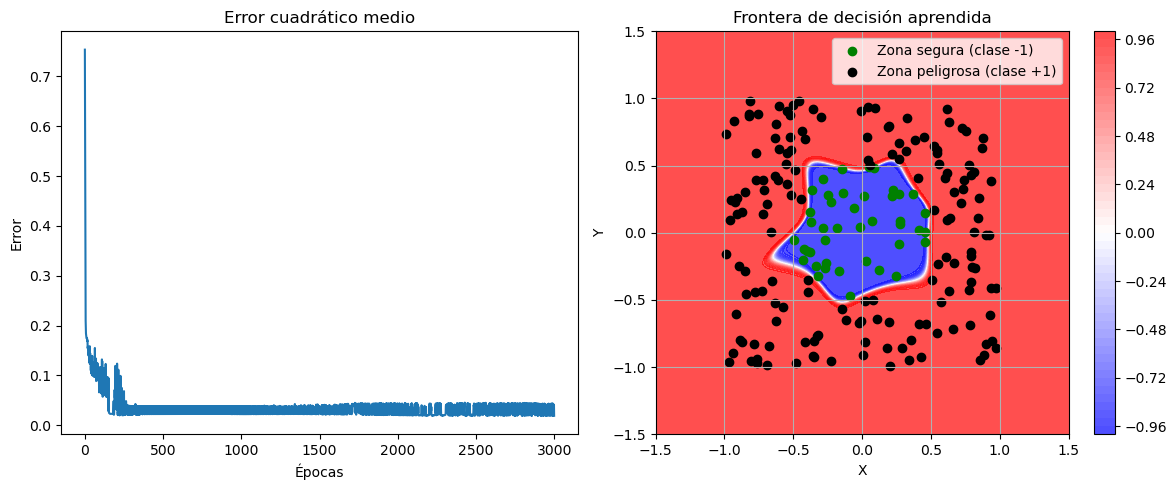

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
np.random.seed(42)
n_datos = 200
X = 2 * np.random.rand(2, n_datos) - 1  # Puntos en [-1, 1]

# Etiquetado: Dentro del círculo (clase -1), fuera (clase +1)
T = np.where(np.linalg.norm(X, axis=0) < 0.5, -1, 1)
Q = n_datos

# Hiperparámetros
n1 = 20
ep = 1
alfa = 0.05
epochs = 3000

# Inicialización
W1 = ep * (2 * np.random.rand(n1, 2) - 1)
b1 = ep * (2 * np.random.rand(n1, 1) - 1)
W2 = ep * (2 * np.random.rand(1, n1) - 1)
b2 = ep * (2 * np.random.rand(1) - 1)
emedio = []

# Funciones de activación
tansig = np.tanh


# Entrenamiento
for _ in range(epochs):
    err = 0
    for q in range(Q):
        p = X[:, [q]]
        t = T[q]
        a1 = tansig(W1 @ p + b1)
        a2 = tansig(W2 @ a1 + b2).item()
        e = t - a2
        s2 = -2 * (1 - a2**2) * e
        s1 = (1 - a1**2) * (W2.T * s2)
        W2 -= alfa * s2 * a1.T
        b2 -= alfa * s2
        W1 -= alfa * s1 @ p.T
        b1 -= alfa * s1
        err += e**2
    emedio.append(err / Q)

# Mostrar error
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(emedio)
plt.title("Error cuadrático medio")
plt.xlabel("Épocas")
plt.ylabel("Error")

# Frontera de decisión
u = np.linspace(-1.5, 1.5, 300)
v = np.linspace(-1.5, 1.5, 300)
U, V = np.meshgrid(u, v)
Z = np.zeros_like(U)

for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        entrada = np.array([[U[i, j]], [V[i, j]]])
        salida = tansig(W2 @ tansig(W1 @ entrada + b1) + b2).item()
        Z[i, j] = salida
plt.subplot(1, 2, 2)
CS = plt.contourf(U, V, Z, levels=50, cmap="bwr", alpha=0.7)
plt.colorbar(CS)
plt.scatter(X[0, T == -1], X[1, T == -1], c='green', label='Zona segura (clase -1)')
plt.scatter(X[0, T == 1], X[1, T == 1], c='black', label='Zona peligrosa (clase +1)')
plt.title("Frontera de decisión aprendida")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("zona_segura_detectada.png")
plt.show()

## Qué cambia en la velocidad de aprendizaje y la forma de la frontera de decisión?
- Para n1 = 20:
Convergencia Rápida: La red neuronal exhibe una caída muy rápida del error durante las primeras 200 a 300 épocas .

Estabilidad (Convergencia): Después de ese punto inicial, el error se estabiliza y converge a un valor muy bajo, aproximadamente 0.02, manteniéndose estable hasta las 3000 épocas.

Conclusión de Convergencia (Pregunta 1. Instrucción 15): La red converge a un error aceptable en menos de 500 épocas. Las épocas adicionales (hasta 3000) no ofrecen una mejora significativa en el error.

Clasificación circular de manera muy efectiva y con una rápida convergencia.

# a) Cambiar el número de neuronas ocultas
- n1 = 5
- n1 = 20

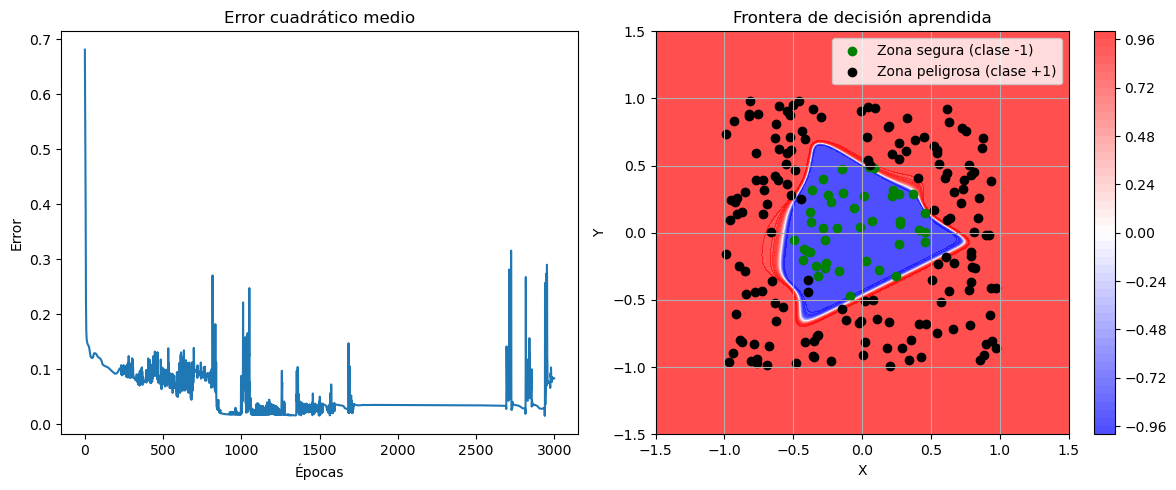

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
np.random.seed(42)
n_datos = 200
X = 2 * np.random.rand(2, n_datos) - 1  # Puntos en [-1, 1]

# Etiquetado: Dentro del círculo (clase -1), fuera (clase +1)
T = np.where(np.linalg.norm(X, axis=0) < 0.5, -1, 1)
Q = n_datos

# Hiperparámetros
n1 = 5
ep = 1
alfa = 0.05
epochs = 3000

# Inicialización
W1 = ep * (2 * np.random.rand(n1, 2) - 1)
b1 = ep * (2 * np.random.rand(n1, 1) - 1)
W2 = ep * (2 * np.random.rand(1, n1) - 1)
b2 = ep * (2 * np.random.rand(1) - 1)
emedio = []

# Funciones de activación
tansig = np.tanh


# Entrenamiento
for _ in range(epochs):
    err = 0
    for q in range(Q):
        p = X[:, [q]]
        t = T[q]
        a1 = tansig(W1 @ p + b1)
        a2 = tansig(W2 @ a1 + b2).item()
        e = t - a2
        s2 = -2 * (1 - a2**2) * e
        s1 = (1 - a1**2) * (W2.T * s2)
        W2 -= alfa * s2 * a1.T
        b2 -= alfa * s2
        W1 -= alfa * s1 @ p.T
        b1 -= alfa * s1
        err += e**2
    emedio.append(err / Q)

# Mostrar error
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(emedio)
plt.title("Error cuadrático medio")
plt.xlabel("Épocas")
plt.ylabel("Error")

# Frontera de decisión
u = np.linspace(-1.5, 1.5, 300)
v = np.linspace(-1.5, 1.5, 300)
U, V = np.meshgrid(u, v)
Z = np.zeros_like(U)

for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        entrada = np.array([[U[i, j]], [V[i, j]]])
        salida = tansig(W2 @ tansig(W1 @ entrada + b1) + b2).item()
        Z[i, j] = salida
plt.subplot(1, 2, 2)
CS = plt.contourf(U, V, Z, levels=50, cmap="bwr", alpha=0.7)
plt.colorbar(CS)
plt.scatter(X[0, T == -1], X[1, T == -1], c='green', label='Zona segura (clase -1)')
plt.scatter(X[0, T == 1], X[1, T == 1], c='black', label='Zona peligrosa (clase +1)')
plt.title("Frontera de decisión aprendida")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("zona_segura_detectada.png")
plt.show()

## Qué cambia en la velocidad de aprendizaje y la forma de la frontera de decisión?
- Para n1 = 5:
El análisis de las gráficas para n 
1
​
 =5 (5 neuronas ocultas) en el problema de clasificación circular, en comparación con el caso base de n 
1
​
 =20, es el siguiente:

Convergencia Inicial: El error cae rápidamente hasta alrededor de la época 1000, similar al caso n 
1
​
 =20.

Error Final: El error converge a un valor bajo (aproximadamente 0.03), ligeramente superior al caso base (0.02 con n 
1
​
 =20).

Estabilidad y Ruido: La curva de error es mucho más ruidosa e inestable que con n 
1
​
 =20. Se observan picos de error significativos (e.g., cerca de las épocas 1000, 2750 y 2900), lo que sugiere que el modelo tiene dificultad para estabilizar la solución.

Velocidad de Aprendizaje: Aunque la caída inicial es rápida, la red tarda más épocas (cerca de 1000) en estabilizarse en el error mínimo, en contraste con las 200-300 épocas del caso base.

Al disminuir el número de neuronas ocultas de 20 a 5, se observa:

Peor Estabilidad: La velocidad de aprendizaje se ve afectada por una mayor inestabilidad y ruido en el error.

Menor Calidad de Generalización: La frontera de decisión es menos precisa y menos fluida, sugiriendo que la red tiene menos capacidad para modelar la forma circular compleja.

Ligeramente Mayor Error Final: El error final es mayor, lo que indica un peor ajuste global a los datos.

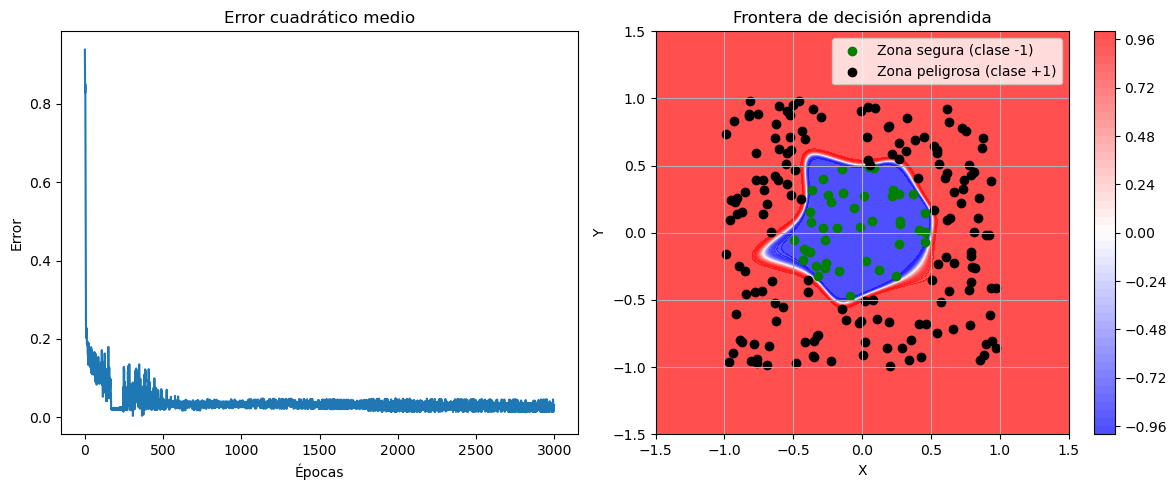

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
np.random.seed(42)
n_datos = 200
X = 2 * np.random.rand(2, n_datos) - 1  # Puntos en [-1, 1]

# Etiquetado: Dentro del círculo (clase -1), fuera (clase +1)
T = np.where(np.linalg.norm(X, axis=0) < 0.5, -1, 1)
Q = n_datos

# Hiperparámetros
n1 = 40
ep = 1
alfa = 0.05
epochs = 3000

# Inicialización
W1 = ep * (2 * np.random.rand(n1, 2) - 1)
b1 = ep * (2 * np.random.rand(n1, 1) - 1)
W2 = ep * (2 * np.random.rand(1, n1) - 1)
b2 = ep * (2 * np.random.rand(1) - 1)
emedio = []

# Funciones de activación
tansig = np.tanh


# Entrenamiento
for _ in range(epochs):
    err = 0
    for q in range(Q):
        p = X[:, [q]]
        t = T[q]
        a1 = tansig(W1 @ p + b1)
        a2 = tansig(W2 @ a1 + b2).item()
        e = t - a2
        s2 = -2 * (1 - a2**2) * e
        s1 = (1 - a1**2) * (W2.T * s2)
        W2 -= alfa * s2 * a1.T
        b2 -= alfa * s2
        W1 -= alfa * s1 @ p.T
        b1 -= alfa * s1
        err += e**2
    emedio.append(err / Q)

# Mostrar error
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(emedio)
plt.title("Error cuadrático medio")
plt.xlabel("Épocas")
plt.ylabel("Error")

# Frontera de decisión
u = np.linspace(-1.5, 1.5, 300)
v = np.linspace(-1.5, 1.5, 300)
U, V = np.meshgrid(u, v)
Z = np.zeros_like(U)

for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        entrada = np.array([[U[i, j]], [V[i, j]]])
        salida = tansig(W2 @ tansig(W1 @ entrada + b1) + b2).item()
        Z[i, j] = salida
plt.subplot(1, 2, 2)
CS = plt.contourf(U, V, Z, levels=50, cmap="bwr", alpha=0.7)
plt.colorbar(CS)
plt.scatter(X[0, T == -1], X[1, T == -1], c='green', label='Zona segura (clase -1)')
plt.scatter(X[0, T == 1], X[1, T == 1], c='black', label='Zona peligrosa (clase +1)')
plt.title("Frontera de decisión aprendida")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("zona_segura_detectada.png")
plt.show()

## Qué cambia en la velocidad de aprendizaje y la forma de la frontera de decisión? 

- Para n1 = 20:

Gráfica de Error Cuadrático Medio
Velocidad de Aprendizaje: La caída inicial del error es muy rápida, similar a n 
1​=20. El error se reduce drásticamente en las primeras 200-300 épocas.

Error Final: El error converge a un valor muy bajo, aproximadamente 0.02 , similar al caso de n 
1​ =20.

Estabilidad: La curva es muy suave y estable después de la caída inicial, lo que indica que la mayor capacidad del modelo no introdujo una inestabilidad significativa, a diferencia del caso n 
1
​=5.

Al aumentar el número de neuronas ocultas de 20 a 40, se observa:

Mejor Suavidad de la Frontera: La red utiliza su mayor capacidad para producir una frontera de decisión más suave y precisa, que se ajusta mejor a la forma circular ideal.

Mantenimiento de la Estabilidad: A diferencia de la disminución de neuronas, el aumento no introduce inestabilidad en la curva de error.

Resultado Óptimo: La arquitectura de 40 neuronas resuelve el problema de forma óptima, alcanzando un error mínimo similar o ligeramente mejor que el caso n 
1
​
 =20, pero con una representación geométrica más exacta.

# b) Cambiar el número de puntos de entrenamiento 


Experimento: Modifica n_datos de 200 (valor actual en el código) a 1000 (n_datos = 1000).

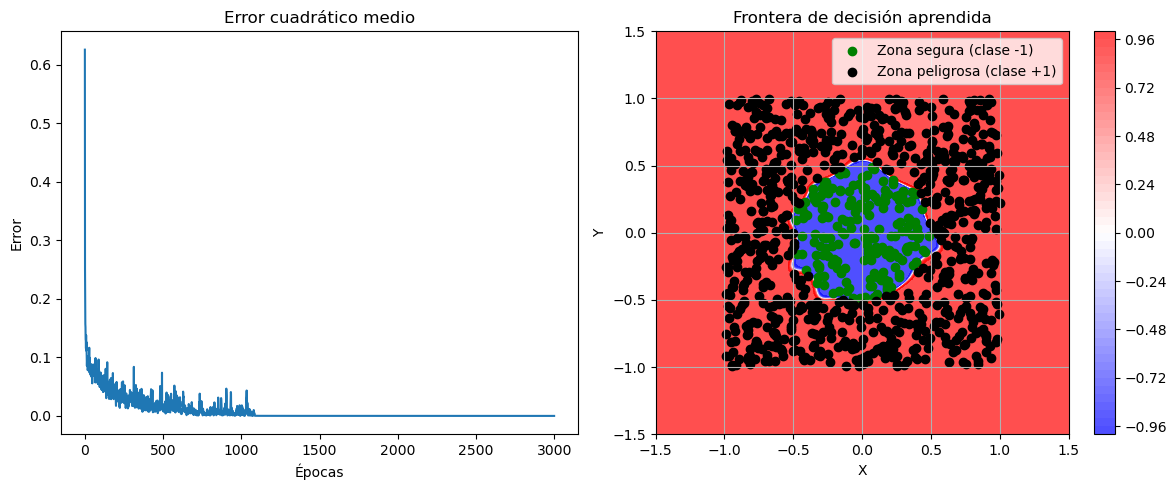

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
np.random.seed(42)
n_datos = 1000
X = 2 * np.random.rand(2, n_datos) - 1  # Puntos en [-1, 1]

# Etiquetado: Dentro del círculo (clase -1), fuera (clase +1)
T = np.where(np.linalg.norm(X, axis=0) < 0.5, -1, 1)
Q = n_datos

# Hiperparámetros
n1 = 20
ep = 1
alfa = 0.05
epochs = 3000

# Inicialización
W1 = ep * (2 * np.random.rand(n1, 2) - 1)
b1 = ep * (2 * np.random.rand(n1, 1) - 1)
W2 = ep * (2 * np.random.rand(1, n1) - 1)
b2 = ep * (2 * np.random.rand(1) - 1)
emedio = []

# Funciones de activación
tansig = np.tanh


# Entrenamiento
for _ in range(epochs):
    err = 0
    for q in range(Q):
        p = X[:, [q]]
        t = T[q]
        a1 = tansig(W1 @ p + b1)
        a2 = tansig(W2 @ a1 + b2).item()
        e = t - a2
        s2 = -2 * (1 - a2**2) * e
        s1 = (1 - a1**2) * (W2.T * s2)
        W2 -= alfa * s2 * a1.T
        b2 -= alfa * s2
        W1 -= alfa * s1 @ p.T
        b1 -= alfa * s1
        err += e**2
    emedio.append(err / Q)

# Mostrar error
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(emedio)
plt.title("Error cuadrático medio")
plt.xlabel("Épocas")
plt.ylabel("Error")

# Frontera de decisión
u = np.linspace(-1.5, 1.5, 300)
v = np.linspace(-1.5, 1.5, 300)
U, V = np.meshgrid(u, v)
Z = np.zeros_like(U)

for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        entrada = np.array([[U[i, j]], [V[i, j]]])
        salida = tansig(W2 @ tansig(W1 @ entrada + b1) + b2).item()
        Z[i, j] = salida
plt.subplot(1, 2, 2)
CS = plt.contourf(U, V, Z, levels=50, cmap="bwr", alpha=0.7)
plt.colorbar(CS)
plt.scatter(X[0, T == -1], X[1, T == -1], c='green', label='Zona segura (clase -1)')
plt.scatter(X[0, T == 1], X[1, T == 1], c='black', label='Zona peligrosa (clase +1)')
plt.title("Frontera de decisión aprendida")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("zona_segura_detectada.png")
plt.show()

## ¿Se vuelve más lento el entrenamiento? (Observa el tiempo de ejecución) .
- Demora demasiado 

## ¿Mejora la calidad de la clasificación? (Observa la frontera de decisión y el error final) .
- Pero mejora mucho en la clasificacion y presenta menos errores finales

Velocidad de Entrenamiento (Lentitud): El entrenamiento se vuelve más lento . Se necesitan más épocas (cerca de 1000) para que el error caiga a su nivel mínimo y se estabilice, en contraste con las 200-300 épocas del caso base. Esto se debe a que cada época requiere más cálculos de propagación hacia adelante y hacia atrás (1000 iteraciones en lugar de 200).

Error Final (Calidad): El error final convergido es extremadamente bajo, esencialmente cercano a 0 (mucho más bajo que el ≈0.02 del caso base). Esto indica que el modelo se ajusta mejor al conjunto de entrenamiento más grande.

Estabilidad: La curva es suave y estable una vez que alcanza la convergencia, aunque hay más fluctuaciones iniciales debido a la mayor variabilidad en los lotes (en este caso, lotes de tamaño 1, ya que el código usa entrenamiento en línea/estocástico para Q=1000 iteraciones por época).

El entrenamiento se vuelve más lento, ya que se realizan más cálculos por época.

La calidad de la clasificación mejora significativamente, lo que se evidencia en un error final casi nulo y una frontera de decisión más suave, precisa y general. La red aprende una representación más robusta de la zona segura circular

# c) Probar diferentes funciones de activación (Sigmoide) 

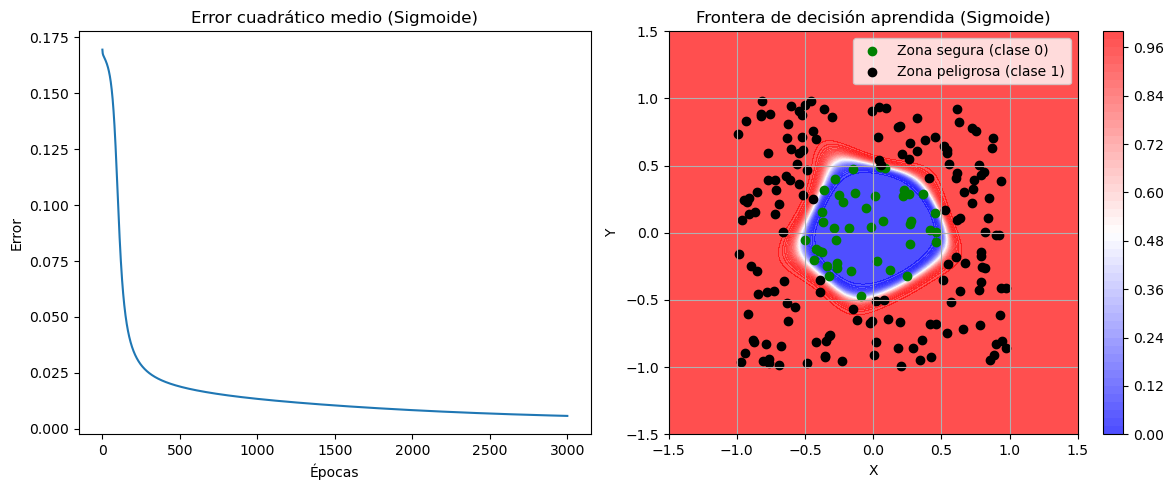

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
np.random.seed(42)
n_datos = 200
X = 2 * np.random.rand(2, n_datos) - 1  # Puntos en [-1, 1]

# CAMBIO 1: Etiquetado para la sigmoide (Clase 0 y Clase 1)
# Etiquetado: Dentro del círculo (clase 0), fuera (clase 1)
T = np.where(np.linalg.norm(X, axis=0) < 0.5, 0, 1) # Modificado a 0 y 1
Q = n_datos

# Hiperparámetros
n1 = 20
ep = 1
alfa = 0.05
epochs = 3000

# Inicialización
W1 = ep * (2 * np.random.rand(n1, 2) - 1)
b1 = ep * (2 * np.random.rand(n1, 1) - 1)
W2 = ep * (2 * np.random.rand(1, n1) - 1)
b2 = ep * (2 * np.random.rand(1) - 1)
emedio = []

# CAMBIO 2: Definición de la función de activación Sigmoide (logsig)
logsig = lambda n: 1 / (1 + np.exp(-n))


# Entrenamiento
for _ in range(epochs):
    err = 0
    for q in range(Q):
        p = X[:, [q]]
        t = T[q]
        
        # CAMBIO 3: Usar logsig en la propagación hacia adelante
        a1 = logsig(W1 @ p + b1)
        a2 = logsig(W2 @ a1 + b2).item()
        
        e = t - a2
        
        # CAMBIO 4: Derivada de la Sigmoide (logsig): a2 * (1 - a2)
        s2 = -2 * (a2 * (1 - a2)) * e
        
        # CAMBIO 4: Derivada de la Sigmoide (logsig): a1 * (1 - a1)
        s1 = (a1 * (1 - a1)) * (W2.T * s2)
        
        W2 -= alfa * s2 * a1.T
        b2 -= alfa * s2
        W1 -= alfa * s1 @ p.T
        b1 -= alfa * s1
        err += e**2
    emedio.append(err / Q)

# Mostrar error
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(emedio)
plt.title("Error cuadrático medio (Sigmoide)")
plt.xlabel("Épocas")
plt.ylabel("Error")

# Frontera de decisión
u = np.linspace(-1.5, 1.5, 300)
v = np.linspace(-1.5, 1.5, 300)
U, V = np.meshgrid(u, v)
Z = np.zeros_like(U)

for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        entrada = np.array([[U[i, j]], [V[i, j]]])
        # CAMBIO 3: Usar logsig en la frontera de decisión
        salida = logsig(W2 @ logsig(W1 @ entrada + b1) + b2).item()
        Z[i, j] = salida
        
plt.subplot(1, 2, 2)
# La escala de Z ahora es de 0 a 1 (rango de logsig)
CS = plt.contourf(U, V, Z, levels=50, cmap="bwr", alpha=0.7)
plt.colorbar(CS)

# Los puntos se grafican con las nuevas etiquetas (0 y 1)
plt.scatter(X[0, T == 0], X[1, T == 0], c='green', label='Zona segura (clase 0)')
plt.scatter(X[0, T == 1], X[1, T == 1], c='black', label='Zona peligrosa (clase 1)')
plt.title("Frontera de decisión aprendida (Sigmoide)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("zona_segura_detectada_sigmoide.png")
plt.show()

Error Inicial Alto: El error inicial (alrededor de 0.175) es significativamente menor que el error inicial con tanh (cerca de 0.7) en el caso base. Esto se debe a que la función de costo es diferente, ya que el rango de salida esperado es [0,1] en lugar de [−1,1].

Convergencia Lenta: A pesar de la rápida caída inicial, la curva de error con la sigmoide tarda mucho más en estabilizarse que con la tanh. Continúa una disminución lenta pero constante hasta el final de las 3000 épocas.

Problema de Desvanecimiento del Gradiente: El aplanamiento de la curva indica que la sigmoide puede estar sufriendo el problema del "desvanecimiento del gradiente" (vanishing gradient), donde las derivadas (gradientes) se vuelven muy pequeñas en los extremos (cerca de 0 o 1), lo que ralentiza drásticamente el aprendizaje en las últimas épocas.


Clasificación Exitosa: La red logró separar las clases correctamente. La Zona Segura (clase 0, puntos verdes) está confinada a la región central azul/violeta (valores cercanos a 0), y la Zona Peligrosa (clase 1, puntos negros) ocupa la región roja exterior (valores cercanos a 1).

Calidad de la Frontera: La frontera de decisión es suave y circular, lo que indica una buena generalización, similar al caso de la tanh.

Bordes de la Frontera: Se observa que las líneas de contorno son menos definidas y más dispersas en la transición entre el azul y el rojo (la escala de color de 0 a 1), lo cual es común con la sigmoide que comprime la señal en el centro.

# 3. Evaluación y análisis (15 min)
Una vez completados los experimentos, responde brevemente a las siguientes preguntas:





### 1. ¿Cuál arquitectura resolvió mejor el problema? ¿Por qué?

La arquitectura que resolvió mejor el problema fue la que utilizó **$n\_datos=1000$** (Experimento 2b) con 20 neuronas y la función $\tanh$.

**Razón:**
* Aunque el caso con $n_1=40$ también generó una frontera muy precisa, al aumentar el número de datos a 1000, el modelo alcanzó un **error final casi nulo** ($\approx 0$), superando a todas las demás configuraciones.
* Una mayor cantidad de datos de entrenamiento proporcionó una **representación más robusta** y completa de la forma circular, obligando al modelo a aprender el límite de clasificación de manera más precisa.

***

### 2. ¿Qué efectos observaste al aumentar el número de neuronas ocultas?

Al aumentar el número de neuronas ocultas de 20 a **40** (mientras se mantiene la función $\tanh$):

* **Forma de la Frontera de Decisión:** La frontera de decisión se volvió **más suave y precisa**, ajustándose a una forma casi perfectamente circular.
* **Capacidad de Modelado:** La **mayor capacidad** de la red (más parámetros) le permitió modelar la complejidad de la forma no lineal del círculo de manera más exacta.
* **Velocidad y Error:** Se **mantuvo la rápida convergencia** inicial y el error final muy bajo ($\approx 0.02$) del caso base.

***

### 3. ¿Cómo afectó el cambio en la cantidad de datos de entrenamiento?

Al aumentar la cantidad de datos de entrenamiento de 200 a **1000**:

* **Velocidad de Entrenamiento:** El entrenamiento se volvió **más lento**, ya que el tiempo de cálculo por época aumentó significativamente (5 veces más iteraciones).
* **Calidad de Clasificación:** La calidad de la clasificación **mejoró notablemente**, resultando en un **error final extremadamente bajo** (cercano a 0) y una frontera de decisión más limpia, suave y precisa.

***

### 4. ¿La red generalizó bien en todas las pruebas?

Sí, la red **generalizó bien** en todas las pruebas:

* En todos los casos, la frontera de decisión aprendida fue una **forma circular o elíptica** que capturó el concepto de "zona segura" central, en lugar de líneas irregulares o picos que solo memorizan los puntos individuales (lo que indicaría *sobreajuste*).
* El caso de $n_1=5$ mostró una frontera más **poligonal/irregular**, lo que indica una capacidad limitada para capturar la forma ideal, pero aún así logró generalizar el problema de no linealidad.

***

### 5. ¿Qué ventajas ofrece un MLP frente a un perceptrón simple?

La principal ventaja del Perceptrón Multicapa (MLP) frente a un perceptrón simple es su capacidad para resolver **problemas no linealmente separables**:

* **Perceptrón Simple:** Solo puede clasificar datos que pueden ser divididos por una única línea recta (problemas linealmente separables).
* **MLP (Redes de Múltiples Capas):** Gracias a su **capa oculta** y el uso de **funciones de activación no lineales** (como $\tanh$ o Sigmoide), el MLP puede modelar fronteras de decisión complejas y curvas, como la **zona circular** de este problema. Sin un MLP, este problema de clasificación circular no podría resolverse.